# Analysis 1

This notebook contains the first exploration and analysis of the data.


In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import json 
import re
from nltk import word_tokenize

df = pd.read_csv('Joel\\Transformers\\TrialbotDatabaseProcessingTools\\results06_09_2022-124336_edited.csv', encoding='utf-8',  on_bad_lines='skip', sep=";")
df = df.dropna(how='all')
df = df.drop_duplicates()

In [2]:
# Inverse Meaning Items have already been recoded before saving into DB
neuro_values = ["neu_item_6","neu_item_21","neu_item_11","neu_item_26","neu_item_41","neu_item_51"]
extra_values = ["ext_item_2","ext_item_7","ext_item_22","ext_item_32","ext_item_37","next_item_52"] # Typo when saving ext_item_52 to db.. but does not matter
off_values = ["off_item_8","off_item_13","off_item_23","off_item_43","off_item_48","off_item_58"]
ver_values = ["ver_item_9", "ver_item_14", "ver_item_24", "ver_item_39","ver_item_49","ver_item_59"]
gew_values = ["gew_item_5","gew_item_10","gew_item_20","gew_item_40","gew_item_50","gew_item_55"]

def Average(l):
    l = list(map(int, l))
    return sum(l) / len(l)


# Scale factor according to the NEO-FFI manual.
def Scale(i):
    i = i * 12
    return i

def compute(dimension, row, mode="percent"):
    values = []
    if dimension == "neuro":
        values = [row[i] for i in neuro_values]
    if dimension == "extra":
        values = [row[i] for i in extra_values]
    if dimension == "off":
        values = [row[i] for i in off_values]
    if dimension == "ver":
        values = [row[i] for i in ver_values]    
    if dimension == "gew":
        values = [row[i] for i in gew_values]    
    mean = Average(values)

    if mode == "likert":
      return mean
    # Scale mean values according to NEO-FFI manual
    # and convert into percentage, with
    # 60 being the max value
    max_value = 60
    skala = (Scale(mean) * 100) / max_value

    return round(skala)

In [3]:
df['neuro_likert'] = df.apply(lambda row: compute("neuro",row, mode="likert"), axis=1)
df['extra_likert'] = df.apply(lambda row: compute("extra",row, mode="likert"), axis=1)
df['off_likert'] = df.apply(lambda row: compute("off",row, mode="likert"), axis=1)
df['ver_likert'] = df.apply(lambda row: compute("ver",row, mode="likert"), axis=1)
df['gew_likert'] = df.apply(lambda row: compute("gew",row, mode="likert"), axis=1)

In [4]:
df['neuro_value'] = df.apply(lambda row: compute("neuro",row), axis=1)
df['extra_value'] = df.apply(lambda row: compute("extra",row), axis=1)
df['off_value'] = df.apply(lambda row: compute("off",row), axis=1)
df['ver_value'] = df.apply(lambda row: compute("ver",row), axis=1)
df['gew_value'] = df.apply(lambda row: compute("gew",row), axis=1)

In [5]:
df.head()

,how_became_aware,gender,sexual_orientation,neu_item_6,neu_item_21,neu_item_11,neu_item_26,neu_item_41,neu_item_51,ext_item_2,...,off_item_48_text,gew_item_55_text,soc_essay,VERSION,chatbot_experience,neuro_likert,extra_likert,off_likert,ver_likert,gew_likert
0,Arbeitskollegin,Männlich,Heterosexuell,4,2,2,2,3,3,5,...,Die Rolle von Kunst und Kultur in der Gesellsc...,"Listen führen, Tabellen machen, Zeitpläne, Pro...","Man trifft sich, ist im Gespräch direkt auf ei...",02.04.2001,Hast du schon gefragt,2.666667,4.166667,4.833333,4.833333,4.000000
1,Auf Empfehlung,Männlich,Heterosexuell,2,3,3,2,2,2,4,...,Technologie,Eine Aufgabenliste,Ein gutes Gespräch in einem Restaurant oder ei...,02.04.2001,"Nein, ich habe zuvor noch nicht mit einem Chat...",2.333333,3.666667,3.666667,4.333333,4.500000
2,Bei einer Teststation beim Josef,Weiblich,kA-SexOrientation,3,3,4,3,3,4,3,...,Mentale Gesundheit. Ich find sie vielen Facett...,Ich räume mein Zimmer auf und ordne meine Sach...,Ich würde raus gehen und auf einer Wiese pickn...,02.04.2001,Nein hab ich nicht.,3.333333,3.333333,3.500000,4.000000,4.333333
3,Berufsschule,Männlich,Heterosexuell,1,2,2,1,1,1,3,...,Technik und die Natur,System und Disziplin,Sehr aufgeregt,02.04.2001,Nein,1.333333,3.166667,3.833333,4.500000,4.833333
4,Besuch im Josephs,Weiblich,Heterosexuell,2,2,2,1,2,2,4,...,Frieden & Nachhaltigkeit bzw. Nachhaltig Leben...,"Ausmisten & Sortieren, unnötige Dinge weggeben...",Wir machen ein Picknick in der Natur und sehen...,02.04.2001,"Ja, teilweise bei Fragen auf Webseiten, die ei...",1.833333,4.000000,3.333333,4.666667,4.500000


## Mean value across all dimensions

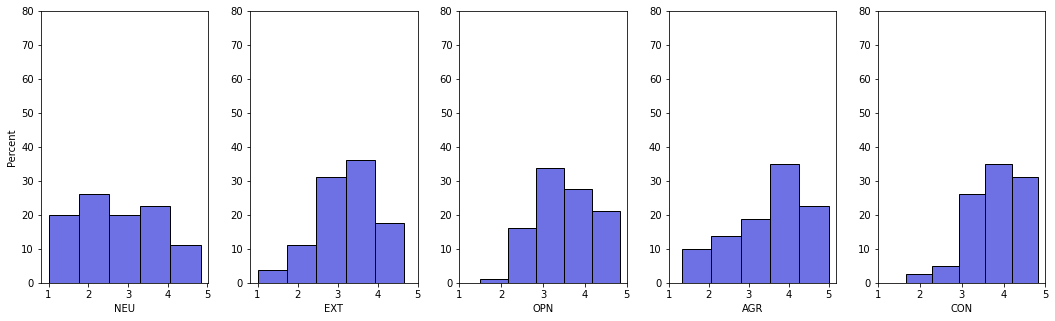

In [5]:
#df.neuro_likert.plot(kind='hist', density=0.1, bins=5, stacked=False, alpha=1)
#df.neuro_likert.hist(density=1)
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt


fig, axs = plt.subplots(ncols=5, figsize=(18,5))
neu = sns.histplot(df,x="neuro_likert", stat="percent",bins=5, ax=axs[0], color="#3d42da")
neu.set(xlabel="NEU",ylim=(0,80), xticks=([1,2,3,4,5]))
ext = sns.histplot(df,x="extra_likert", stat="percent",bins=5, ax=axs[1], color="#3d42da")
ext.set(xlabel="EXT",ylabel=None, ylim=(0,80), xticks=([1,2,3,4,5]))
opn = sns.histplot(df,x="off_likert", stat="percent",bins=5, ax=axs[2], color="#3d42da")
opn.set(xlabel="OPN",ylabel=None,ylim=(0,80), xticks=([1,2,3,4,5]))
agr = sns.histplot(df,x="ver_likert", stat="percent",bins=5, ax=axs[3], color="#3d42da")
agr.set(xlabel="AGR",ylabel=None, ylim=(0,80), xticks=([1,2,3,4,5]))
con = sns.histplot(df,x="gew_likert", stat="percent",bins=5, ax=axs[4], color="#3d42da")
con.set(xlabel="CON",ylabel=None, ylim=(0,80), xticks=([1,2,3,4,5]))

plt.subplots_adjust(wspace=0.25)

In [ ]:
print("Neuroticism mean: " + str(df["neuro_value"].mean()))
print("Extraversion mean: " + str(df["extra_value"].mean()))
print("Openness mean: " + str(df["off_value"].mean()))
print("Agreeableness mean: " + str(df["ver_value"].mean()))
print("Conscientousness mean: " + str(df["gew_value"].mean()))

Neuroticism mean: 55.7625
Extraversion mean: 65.1
Openness mean: 68.775
Agreeableness mean: 69.5625
Conscientousness mean: 76.7875


The evaluation shows that the average score of the participants on the dimensions "extraversion, openness and agreeableness" is on a similar level. In contrast, the average of the participants **is** particularly "conscientious" and **is not** very "neurotic".

Of course, factors such as regionality or willingness to participate in a study can distort these values.
However, since the study was conducted in the context of an exhibition by a fairly diverse group of participants (including high school students, college students, professors, university employees, family and friends, etc.), it should be assumed that this approximately reflects the average of the target group concerned. 


Thus, in order to increase the discriminatory power of the modeling, a binary classification is introduced from now on, which assigns the author of a text one of the five personality dimensions with "1" (personality dimension is pronounced), if this author has an above-average value on this dimension. Otherwise, the classification is to be "0" (personality dimension is not pronounced).

The modeling therefore depicts an extreme value approach. This facilitates the classification, especially with the rather small amount of available data. Although Big Five is one of the most scientifically recognized methods for modeling personalities, the test procedures themselves harbor a high degree of inaccuracy and low reproducibility. In this respect, modeling can only be done in tendencies anyway.

In [9]:
def binarize_scores_average(dimension, value):
    if dimension == "neuro":
        if value > 56:
          return 1
    if dimension == "extra":
        if value > 65:
          return 1
    if dimension == "off":
        if value > 69:
          return 1
    if dimension == "ver":
        if value > 69:
          return 1  
    if dimension == "gew":
        if value > 76:
          return 1 

    return 0

In [10]:
df['text'] = df[['how_became_aware', 'ext_item_7_text', 'gew_item_20_text', 'ext_item_32_text', 'off_item_48_text', 'gew_item_55_text', 'soc_essay']].apply(". ".join, axis=1) # chatbot_experience missing for now
df_train_averaged_classification = df.copy()
df_train_averaged_classification['neuro_bin'] = df.apply(lambda row: binarize_scores_average("neuro", row['neuro_value']), axis=1)
df_train_averaged_classification['extra_bin'] = df.apply(lambda row: binarize_scores_average("extra", row['extra_value']), axis=1)
df_train_averaged_classification['off_bin'] = df.apply(lambda row: binarize_scores_average("off", row['off_value']), axis=1)
df_train_averaged_classification['ver_bin'] = df.apply(lambda row: binarize_scores_average("ver", row['ver_value']), axis=1)
df_train_averaged_classification['gew_bin'] = df.apply(lambda row: binarize_scores_average("gew", row['gew_value']), axis=1)
df_train_averaged_classification.head()

,how_became_aware,gender,sexual_orientation,neu_item_6,neu_item_21,neu_item_11,neu_item_26,neu_item_41,neu_item_51,ext_item_2,...,extra_value,off_value,ver_value,gew_value,text,neuro_bin,extra_bin,off_bin,ver_bin,gew_bin
0,Arbeitskollegin,Männlich,Heterosexuell,4,2,2,2,3,3,5,...,83,97,97,80,Arbeitskollegin. Auf einer Hochzeit. Seife gek...,0,1,1,1,1
1,Auf Empfehlung,Männlich,Heterosexuell,2,3,3,2,2,2,4,...,73,73,87,90,Auf Empfehlung. Als ein Freund eine Story erzä...,0,1,1,1,1
2,Bei einer Teststation beim Josef,Weiblich,kA-SexOrientation,3,3,4,3,3,4,3,...,67,70,80,87,Bei einer Teststation beim Josef. Als ich mit ...,1,1,1,1,1
3,Berufsschule,Männlich,Heterosexuell,1,2,2,1,1,1,3,...,63,77,90,97,Berufsschule. In der famiele. Heute morgen auf...,0,0,1,1,1
4,Besuch im Josephs,Weiblich,Heterosexuell,2,2,2,1,2,2,4,...,80,67,93,90,"Besuch im Josephs. Keine konkrete Erinnerung, ...",0,1,0,1,1


In [ ]:
df_train_averaged_classification.count()

how_became_aware      81
gender                81
sexual_orientation    81
neu_item_6            81
neu_item_21           81
neu_item_11           81
neu_item_26           81
neu_item_41           81
neu_item_51           81
ext_item_2            81
ext_item_7            81
ext_item_22           81
ext_item_32           81
ext_item_37           81
next_item_52          81
off_item_8            81
off_item_13           81
off_item_23           81
off_item_43           81
off_item_48           81
off_item_58           81
ver_item_9            81
ver_item_14           81
ver_item_24           81
ver_item_39           81
ver_item_49           81
ver_item_59           81
gew_item_5            81
gew_item_10           81
gew_item_20           81
gew_item_40           81
gew_item_50           81
gew_item_55           81
ext_item_7_text       81
gew_item_20_text      81
ext_item_32_text      81
off_item_48_text      81
gew_item_55_text      81
soc_essay             81
VERSION               81


In [11]:
import string

total_str_len = 0
word_list = []
total_wd_count = 0
for index, row in df.iterrows():
  total_str_len += len(row["text"])
  words = row["text"].split()
  for word in words:
    word = word.translate(str.maketrans('', '', string.punctuation)) # Strip punctuation
    word_list.append(word) if word not in word_list else word_list
  total_wd_count += len(words)
print("Total str length: " + str(total_str_len))
print("Total word count: " + str(total_wd_count))
print("Number of unique words: " + str(len(word_list)))

Total str length: 35873
Total word count: 5582
Number of unique words: 1803


In [ ]:
df_train_averaged_classification = df_train_averaged_classification[['text', 'neuro_bin', 'extra_bin', 'off_bin', 'ver_bin', 'gew_bin']]
df_train_averaged_classification['text'] = df_train_averaged_classification['text'].apply(lambda x: x.replace('\n', ' '))
df_train_averaged_classification['labels'] = list(zip(df_train_averaged_classification.neuro_bin.tolist(), df_train_averaged_classification.extra_bin.tolist(), df_train_averaged_classification.off_bin.tolist(), df_train_averaged_classification.ver_bin.tolist(),  df_train_averaged_classification.gew_bin.tolist()))
df_train_averaged_classification.head()


,text,neuro_bin,extra_bin,off_bin,ver_bin,gew_bin,labels
0,Arbeitskollegin. Auf einer Hochzeit. Seife gek...,0,1,1,1,1,"(0, 1, 1, 1, 1)"
1,Auf Empfehlung. Als ein Freund eine Story erzä...,0,1,1,1,1,"(0, 1, 1, 1, 1)"
2,Bei einer Teststation beim Josef. Als ich mit ...,1,1,1,1,1,"(1, 1, 1, 1, 1)"
3,Berufsschule. In der famiele. Heute morgen auf...,0,0,1,1,1,"(0, 0, 1, 1, 1)"
4,"Besuch im Josephs. Keine konkrete Erinnerung, ...",0,1,0,1,1,"(0, 1, 0, 1, 1)"


### Checking out pandas description

In [ ]:
df_train_averaged_classification.describe(include='all')

,text,neuro_bin,extra_bin,off_bin,ver_bin,gew_bin,labels
count,81,81.000000,81.000000,81.000000,81.000000,81.000000,81
unique,80,NaN,NaN,NaN,NaN,NaN,28
top,über das Josephs. beim Weinfest mit Freundinne...,NaN,NaN,NaN,NaN,NaN,"(0, 1, 1, 1, 1)"
freq,2,NaN,NaN,NaN,NaN,NaN,7
mean,NaN,0.481481,0.543210,0.493827,0.604938,0.518519,NaN
std,NaN,0.502770,0.501233,0.503077,0.491910,0.502770,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,0.000000,1.000000,0.000000,1.000000,1.000000,NaN
75%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


### Checking out the pandas Profiling Report

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_train_averaged_classification, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Removing duplicate

In [ ]:
df_train_averaged_classification = df_train_averaged_classification.drop_duplicates()

Let's see if there are entries with none of the dimensions being positive. Those MAY BE faulty tests.

In [ ]:
df_train_averaged_classification.loc[df_train_averaged_classification['labels'] == (0,0,0,0,0)]

,text,neuro_bin,extra_bin,off_bin,ver_bin,gew_bin,labels
9,Durch Empfehlung. Über das Hide the Pain Harol...,0,0,0,0,0,"(0, 0, 0, 0, 0)"
10,Durch Freunde. Hiding the Pain Harold angescha...,0,0,0,0,0,"(0, 0, 0, 0, 0)"
55,TH Nürnberg. Heute im Team-Meeting.. 9 Stunden...,0,0,0,0,0,"(0, 0, 0, 0, 0)"
71,Über Familie. Als ich mit Freunden am See war ...,0,0,0,0,0,"(0, 0, 0, 0, 0)"


Manually inspecting those entries, it seems like those are legitimate entries.

Next, let's see if there are entries with very short texts.

In [ ]:
print(df_train_averaged_classification.text.str.len().sort_values())

38      63
11      77
60      98
67     100
53     108
      ... 
32    1059
63    1067
50    1074
77    1153
14    1353
Name: text, Length: 80, dtype: int64


Average String length:

In [ ]:
df_train_averaged_classification.to_csv("Joel\\datasets\\df_train_averaged_classification.csv", index=False)

In [ ]:
df_train_averaged_classification.text.str.len().mean()

448.4125

In [ ]:
df_train_averaged_classification.loc[df_train_averaged_classification['text'].str.len() < 140]

,text,neuro_bin,extra_bin,off_bin,ver_bin,gew_bin,labels
3,Berufsschule. In der famiele. Heute morgen auf...,0,0,1,1,1,"(0, 0, 1, 1, 1)"
11,Durch Keter. Schwierig zu erklären. Früh aufzu...,1,1,0,0,0,"(1, 1, 0, 0, 0)"
38,Josefs. Witzvon meinem Creund. Feutsch. Gut. G...,0,0,0,1,1,"(0, 0, 0, 1, 1)"
41,Josephs. Beim feiern. Ich bin aufgestanden. Gu...,1,0,0,0,0,"(1, 0, 0, 0, 0)"
53,Qr code. Mit meinen Freunden. Ich bin pünktlic...,1,0,1,0,0,"(1, 0, 1, 0, 0)"
56,Testuser. Film. Arbeit erledigt. Passiert selt...,1,0,1,0,1,"(1, 0, 1, 0, 1)"
60,Zukunftsmuseum. Witz. Schlafen😉. Sehr gut. Kli...,0,1,0,1,1,"(0, 1, 0, 1, 1)"
67,ich musste. gestern. hier zu chatten. na eben ...,0,1,0,0,1,"(0, 1, 0, 0, 1)"


The german language has an average word length of 10.6, according to the "Duden". However, the average word length in the "Dudenkorpus" is 5.99, because this number is inherited from real text with many occurences of simple words like "der, und, zu, etc.".

Considering an average word length of 5.99 characters, the shortest entry has a word count of 10.5 (63 characters) and the longest entry a word count of 226 (1353 characters), while average word count is 75 (448 characters).

Even the shortest entries seem to be legitimate according to manual inspectation and therefore shall not be deleted. However, the discrepancy might cause some overfitting, which shall be subject of observation.

### Correlation between dimensions

In [ ]:
df_dimensions = df_train_averaged_classification[['neuro_bin', 'extra_bin', 'off_bin', 'ver_bin', 'gew_bin']]
df_dimensions.head(2)

,neuro_bin,extra_bin,off_bin,ver_bin,gew_bin
0,0,1,1,1,1
1,0,1,1,1,1


In [ ]:
corr = df_dimensions.corr()
corr.style.background_gradient(cmap='coolwarm')
corr

,neuro_bin,extra_bin,off_bin,ver_bin,gew_bin
neuro_bin,1.000000,-0.248904,0.199500,-0.071466,-0.149468
extra_bin,-0.248904,1.000000,0.102195,0.061410,0.198747
off_bin,0.199500,0.102195,1.000000,0.234816,-0.049406
ver_bin,-0.071466,0.061410,0.234816,1.000000,0.224607
gew_bin,-0.149468,0.198747,-0.049406,0.224607,1.000000


While the correlactions are not strong, some expected tendencies can be observed:

*   Neurotic people are often NOT extravert and vice versa
*   There is no correlation between neuroticism and agreeableness
*   People with high openness tend to be more agreeable 

Neuroticism and extraversion tend to be regarded as opposites. Also in the present data set they form the highest (anti)correlation.


Interestingly, conscious people also seem to be more extravert and agreeable. 



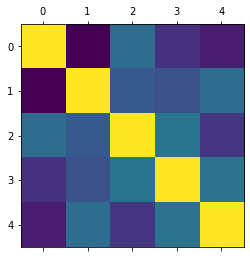

In [ ]:
plt.matshow(corr)
plt.show()

In [ ]:
df_train_averaged_classification.to_csv('Joel\\datasets\\sds\\full_edited_2022_09_14.csv', index=False)

An important step here is to ensure that our train and test sets come from the same distribution so that any improvements on the train set is reflected in the test set.

A common technique used by Kagglers is to use “Adversarial Validation” between the different datasets. (I’ve seen it go by many names, but I think this one is the most common)

The idea is very simple, we mix both datasets and train a classifier to try and distinguish between them. If the classifier fails to do so — we can conclude that the distributions are similar. 

In [ ]:
# Now lets split the data

from sklearn.model_selection import train_test_split 

#train, test = train_test_split(df_train_averaged_classification, shuffle = True, stratify = df_train_averaged_classification.labels, test_size=0.1, random_state = 50)
#test, _ = train_test_split(test, shuffle = True, stratify = test.label, train_size = 10000/test.shape[0], random_state = 50)
train, test = train_test_split(df_train_averaged_classification, test_size=0.3)
train.shape, test.shape



((56, 7), (24, 7))

In [ ]:
# Check wether train and test datasets are distributed similar
# Adverserial Validation
from scipy import sparse
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold


def adversarial_validation(X, Y, n_splits = 10):
    
    # Combine both datasets
    sparse_merge = sparse.vstack((X, Y))
    
    # Label the datasets
    y = np.array([0 for _ in range(X.shape[0])] + [1 for _ in range(Y.shape[0])])
    
    # Do 10 Fold CV 
    kfold = StratifiedKFold(n_splits = n_splits, shuffle = True)

    lr_auc = np.array([])
    rf_auc = np.array([])
    for train_idx, test_idx in kfold.split(sparse_merge, y):
    
        #Run Log Reg
        x_train, y_train = sparse_merge[train_idx], y[train_idx]
        x_test, y_test = sparse_merge[test_idx], y[test_idx]
        
        log_reg = SGDClassifier(loss = 'log')
        log_reg.fit(x_train, y_train)
        y_test_prob = log_reg.predict_proba(x_test)[:,1]
        lr_auc = np.append(lr_auc, roc_auc_score(y_test, y_test_prob))
        # Run RF
        rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
        rf.fit(x_train, y_train)
        y_test_prob = rf.predict_proba(x_test)[:,1]
        rf_auc = np.append(rf_auc, roc_auc_score(y_test, y_test_prob))

    
    # Display results
    print('Logisitic Regression AUC : {:.3f}'.format(lr_auc.mean()))
    print('Random Forest AUC : {:.3f}'.format(rf_auc.mean())) 

In [ ]:
# Lets use Bag-Of-Words to encode our texts before doing adverserial validation

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle 

bow = CountVectorizer()
x_train = bow.fit_transform(train.text.values)
x_test = bow.transform(test.text.values)

x_test = shuffle(x_test)

adversarial_validation(x_train, x_test)

C:\Users\Max\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Max\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Max\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Max\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which 

Logisitic Regression AUC : 0.286
Random Forest AUC : 0.374


In [ ]:
train.to_csv('Joel\\datasets\\sds\\train_04.csv', index = False)
test.to_csv('Joel\\datasets\\sds\\test_04.csv', index = False)

# Simple Exploratory Data Analysis

## Balance Analysis

Hinweis!! Der Train-Test-Split wurde auf 0.6 : 0.4 geändert. Diese Daten sind jetzt outdated. Die Balance wurde aber an anderer Stelle getestet und ist sogar noch besser.

In [ ]:
print('Train Positive Neuroticism % : {:.1f}'.format((sum(train.neuro_bin == 1)/train.shape[0])*100))
print('Train Positive Extaversion % : {:.1f}'.format((sum(train.extra_bin == 1)/train.shape[0])*100))
print('Train Positive Openness % : {:.1f}'.format((sum(train.off_bin == 1)/train.shape[0])*100))
print('Train Positive Agreeableness % : {:.1f}'.format((sum(train.ver_bin == 1)/train.shape[0])*100))
print('Train Positive Conscientousness % : {:.1f}'.format((sum(train.gew_bin == 1)/train.shape[0])*100))
print("\n")
print('Test Positive Neuroticism % : {:.1f}'.format((sum(test.neuro_bin == 1)/test.shape[0])*100))
print('Test Positive Extaversion % : {:.1f}'.format((sum(test.extra_bin == 1)/test.shape[0])*100))
print('Test Positive Openness % : {:.1f}'.format((sum(test.off_bin == 1)/test.shape[0])*100))
print('Test Positive Agreeableness % : {:.1f}'.format((sum(test.ver_bin == 1)/test.shape[0])*100))
print('Test Positive Conscientousness % : {:.1f}'.format((sum(test.gew_bin == 1)/test.shape[0])*100))
print("\n")
print('Train Size: {}'.format(train.shape[0]))
print('Test Size: {}'.format(test.shape[0]))

Train Positive Neuroticism % : 48.4
Train Positive Extaversion % : 56.2
Train Positive Openness % : 50.0
Train Positive Agreeableness % : 59.4
Train Positive Conscientousness % : 50.0


Test Positive Neuroticism % : 50.0
Test Positive Extaversion % : 43.8
Test Positive Openness % : 43.8
Test Positive Agreeableness % : 62.5
Test Positive Conscientousness % : 56.2


Train Size: 64
Test Size: 16


In [ ]:
train.to_csv('Joel\\datasets\\sds\\train_more_balanced.csv', index = False)
test.to_csv('Joel\\datasets\\sds\\test_more_balanced.csv', index = False)

## Word Analysis

### Word Clustering

Hinweis!! Im Notebook Feature_Engineering sind ist die Wörterverteilung noch einmal genauer für alle Dimensionen und ohne Stoppwörter aufgedröselt.

Overall Wordcloud:

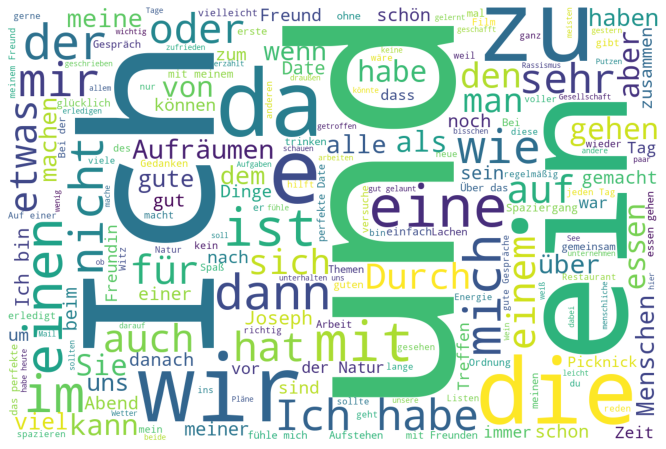

In [ ]:
%matplotlib inline
from wordcloud import WordCloud 
import matplotlib.pyplot as plt


wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(train.text.values)) 

plt.figure(figsize = (12, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show() 



Wordcloud for highly neurotic persons:

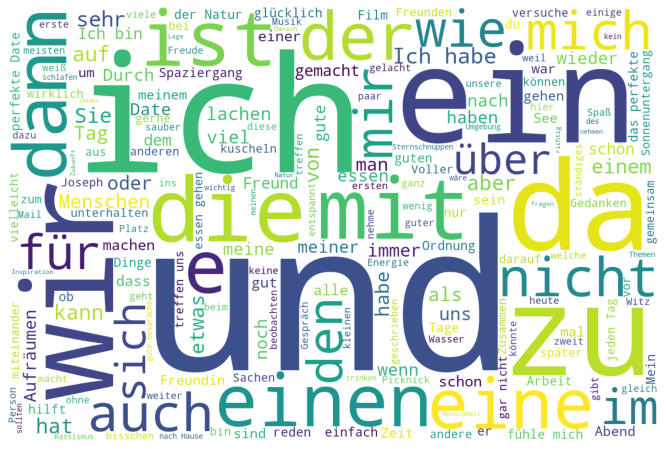

In [ ]:
%matplotlib inline
from wordcloud import WordCloud 
import matplotlib.pyplot as plt


wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(train[train.neuro_bin == 1].text.values)) 

plt.figure(figsize = (12, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show() 


Wordcloud for highly extravert persons:

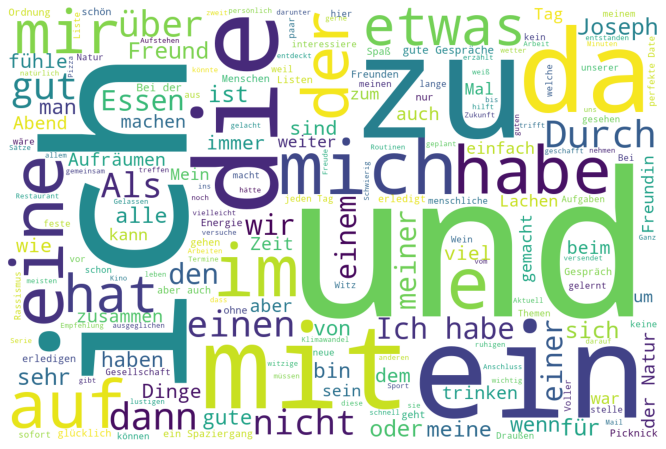

In [ ]:
%matplotlib inline
from wordcloud import WordCloud 
import matplotlib.pyplot as plt


wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(train[train.extra_bin == 1].text.values)) 

plt.figure(figsize = (12, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show() 

### Number of words

#### Number of words

Let's compare number of words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Max\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Max\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Max\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Max\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed i

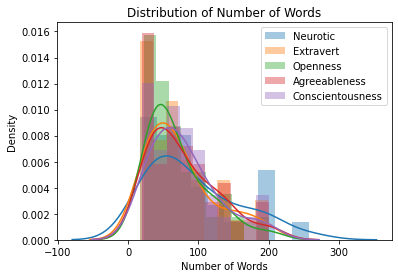

In [ ]:
# What is the effect of number of words ? 
import nltk
nltk.download('punkt')
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

neurotic_length = [len(word_tokenize(text)) for text in train[train.neuro_bin.values == 1].text.values]
extravert_length = [len(word_tokenize(text)) for text in train[train.extra_bin.values == 1].text.values]
open_length = [len(word_tokenize(text)) for text in train[train.off_bin.values == 1].text.values]
agre_length = [len(word_tokenize(text)) for text in train[train.ver_bin.values == 1].text.values]
cons_length = [len(word_tokenize(text)) for text in train[train.gew_bin.values == 1].text.values]

sns.distplot(neurotic_length, bins = 10, label = 'Neurotic')
sns.distplot(extravert_length, bins = 10, label = 'Extravert')
sns.distplot(open_length, bins = 10, label = 'Openness')
sns.distplot(agre_length, bins = 10, label = 'Agreeableness')
sns.distplot(cons_length, bins = 10, label = 'Conscientousness')
plt.legend()
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.show()

It looks like neurotic people use more words in the given context (aka write the most). This seems unusual at first, but perhaps neurotic individuals are more inclined to express their thoughts and feelings to a chatbot.

#### Mean word length

C:\Users\Max\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Max\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Max\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

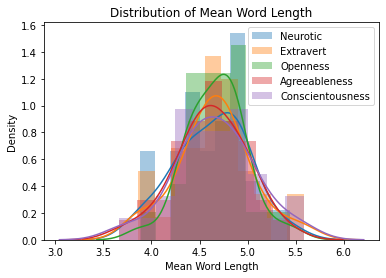

In [ ]:
def mean_word_length(x):
    word_lengths = np.array([])
    for word in word_tokenize(x):
        word_lengths = np.append(word_lengths, len(word))
    return word_lengths.mean()

neurotic_length = train[train.neuro_bin.values == 1].text.apply(mean_word_length)
extravert_length = train[train.extra_bin.values == 1].text.apply(mean_word_length)
open_length = train[train.off_bin.values == 1].text.apply(mean_word_length)
agre_length = train[train.ver_bin.values == 1].text.apply(mean_word_length)
cons_length = train[train.gew_bin.values == 1].text.apply(mean_word_length)

sns.distplot(neurotic_length, bins = 10, label = 'Neurotic')
sns.distplot(extravert_length, bins = 10, label = 'Extravert')
sns.distplot(open_length, bins = 10, label = 'Openness')
sns.distplot(agre_length, bins = 10, label = 'Agreeableness')
sns.distplot(cons_length, bins = 10, label = 'Conscientousness')

plt.title('Distribution of Mean Word Length')
plt.xlabel('Mean Word Length')
plt.legend()

Word length seems distributed evenly between all five dimensions, disregarding outliers. 

#### Stop Words

Neurotic Mean: 0.319
Extravert Mean: 0.306
Openness Mean: 0.309
Agreeableness Mean: 0.305
Conscientousness Mean: 0.304


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Max\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Max\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Max\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Max\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be r

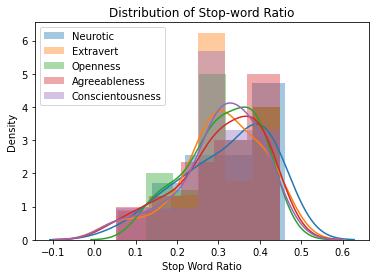

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words('german'))
    
    
def stop_words_ratio(x):
    num_total_words = 0
    num_stop_words = 0
    for word in word_tokenize(x):
        if word in stop_words:
            num_stop_words += 1
        num_total_words += 1 
    return num_stop_words/num_total_words


neurotic_length = train[train.neuro_bin.values == 1].text.apply(stop_words_ratio)
extravert_length = train[train.extra_bin.values == 1].text.apply(stop_words_ratio)
open_length = train[train.off_bin.values == 1].text.apply(stop_words_ratio)
agre_length = train[train.ver_bin.values == 1].text.apply(stop_words_ratio)
cons_length = train[train.gew_bin.values == 1].text.apply(stop_words_ratio)


sns.distplot(neurotic_length, norm_hist = True, label = 'Neurotic')
sns.distplot(extravert_length,  label = 'Extravert')
sns.distplot(open_length,  label = 'Openness')
sns.distplot(agre_length,  label = 'Agreeableness')
sns.distplot(cons_length,  label = 'Conscientousness')

print('Neurotic Mean: {:.3f}'.format(neurotic_length.values.mean()))
print('Extravert Mean: {:.3f}'.format(extravert_length.values.mean()))
print('Openness Mean: {:.3f}'.format(open_length.values.mean()))
print('Agreeableness Mean: {:.3f}'.format(agre_length.values.mean()))
print('Conscientousness Mean: {:.3f}'.format(cons_length.values.mean()))
plt.title('Distribution of Stop-word Ratio')
plt.xlabel('Stop Word Ratio')
plt.legend()

Stop word ratio is distributed rather similar.

## Visualizations

### TSNE with Bag-of-Words Embedding

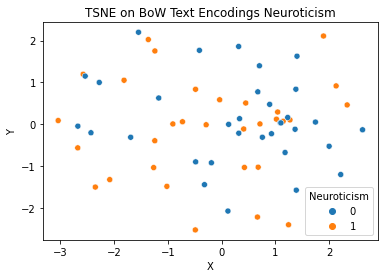

In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

bow = CountVectorizer()

x_train = bow.fit_transform(train.text.values)

tsne = TSNE(n_components = 2, n_jobs= -1, verbose = 10, perplexity = 40)
tsne_data = tsne.fit_transform(x_train.todense())

tsne_data = pd.DataFrame(tsne_data, columns = ['X', 'Y'])
tsne_data['Neuroticism'] = train.neuro_bin.values

sns.scatterplot(x = 'X', y = 'Y', hue = 'Neuroticism', data = tsne_data)
plt.title('TSNE on BoW Text Encodings Neuroticism')
plt.show()

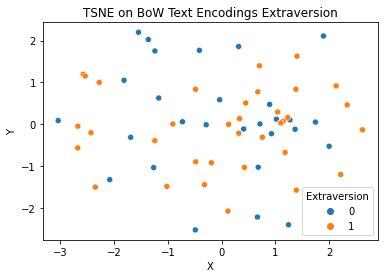

In [ ]:
tsne_data = pd.DataFrame(tsne_data, columns = ['X', 'Y'])
tsne_data['Extraversion'] = train.extra_bin.values

sns.scatterplot(x = 'X', y = 'Y', hue = 'Extraversion', data = tsne_data)
plt.title('TSNE on BoW Text Encodings Extraversion')
plt.show()

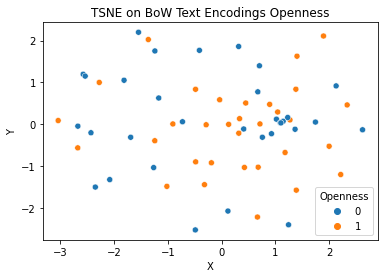

In [ ]:
tsne_data = pd.DataFrame(tsne_data, columns = ['X', 'Y'])
tsne_data['Openness'] = train.off_bin.values

sns.scatterplot(x = 'X', y = 'Y', hue = 'Openness', data = tsne_data)
plt.title('TSNE on BoW Text Encodings Openness')
plt.show()

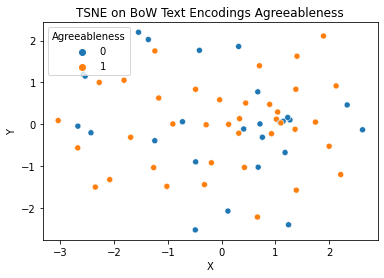

In [ ]:
tsne_data = pd.DataFrame(tsne_data, columns = ['X', 'Y'])
tsne_data['Agreeableness'] = train.ver_bin.values

sns.scatterplot(x = 'X', y = 'Y', hue = 'Agreeableness', data = tsne_data)
plt.title('TSNE on BoW Text Encodings Agreeableness')
plt.show()

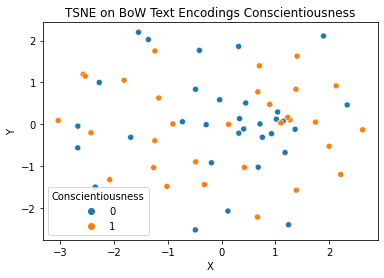

In [ ]:
tsne_data = pd.DataFrame(tsne_data, columns = ['X', 'Y'])
tsne_data['Conscientiousness'] = train.gew_bin.values

sns.scatterplot(x = 'X', y = 'Y', hue = 'Conscientiousness', data = tsne_data)
plt.title('TSNE on BoW Text Encodings Conscientiousness')
plt.show()

#### PCA 

C:\Users\Max\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


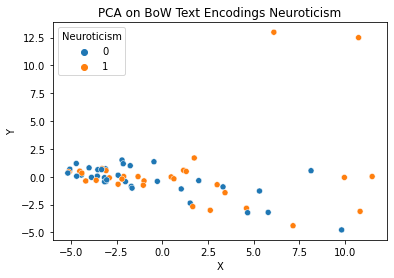

In [ ]:
from sklearn.decomposition import PCA


bow = CountVectorizer()

x_train = bow.fit_transform(train.text.values)

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(x_train.todense())


pca_data = pd.DataFrame(pca_data, columns = ['X', 'Y'])
pca_data['Neuroticism'] = train.neuro_bin.values

sns.scatterplot(x = 'X', y = 'Y', hue = 'Neuroticism', data = pca_data)
plt.title('PCA on BoW Text Encodings Neuroticism')
plt.show()



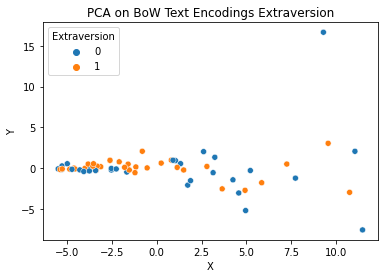

In [ ]:
pca_data = pd.DataFrame(pca_data, columns = ['X', 'Y'])
pca_data['Extraversion'] = train.extra_bin.values

sns.scatterplot(x = 'X', y = 'Y', hue = 'Extraversion', data = pca_data)
plt.title('PCA on BoW Text Encodings Extraversion')
plt.show()

## Deprecated Test with more filtering of very short string length and occurences of "a b c d e". Didnt yield better results!

In [ ]:
#minimum_str_len = 20 
#df_train_adjusted = df.copy()
#df_train_adjusted['text'] = df[['how_became_aware', 'ext_item_7_text', 'gew_item_20_text', 'ext_item_32_text', 'off_item_48_text', 'gew_item_55_text', 'soc_essay']].apply(lambda row: "".join([y + ". " if y is not None and len(y) > minimum_str_len else "" for y in row.values]), axis=1)# chatbot_experience missing for now
